In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sklearn.metrics
import textwrap
import tqdm.notebook as tqdm
import yaml

import score

/home/arpan/miniconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
def train():
    scorer = score.new_scorer()
    scorer.train(score.get_train_data())
    scorer.save()
    return scorer

In [4]:
def show_question(question_id):
    questions = []
    for topic in os.listdir("../../questions/topics"):
        if topic == '.ipynb_checkpoints' or os.path.isfile(f'../../questions/topics/{topic}'):
            continue
        with open(f"../../questions/topics/{topic}/questions.yaml") as f:
            questions.extend(yaml.safe_load(f))

    question = [q for q in questions if q["Id"] == question_id][0]

    print(question['Question'])

Create scorer from data. Everytime the question data is modified, you need to re-run this cell.

In [32]:
scorer = train()

100%|██████████| 95/95 [00:00<00:00, 130.92it/s]


INFO:tensorflow:Assets written to: ./trained_models/nn_use4_scorer/embedding_model.ckpt/assets


Choose a question to evaluate (by question id).

In [33]:
question_id = "Trauma 15"
show_question(question_id)

Which inflammatory marker is most closely tied to a systemic inflammatory response following orthopaedic injury and treatment?



In [34]:
responses = [
   'Interleukin 7'
]

for r in responses:
    print(f'{r}: {scorer.score(question_id, r)}')
    print('----------------------')

Interleukin 7: 0
----------------------


## Evaluate on Test Set

In [5]:
scorer = score.new_scorer(verbose=False)
# scorer = score.GPT3_Scorer('trained_models/gpt3_scorer')

In [58]:
# Load test set
contested_test_set = pd.read_csv('contested_evals_test_set.csv')
y_hat = np.array([scorer.score(qid, response)
                  for qid, response in tqdm.tqdm(zip(contested_test_set['QID'], contested_test_set['X']))])
y = contested_test_set['y'].to_numpy()

116it [01:07,  1.71it/s]


In [45]:
y.mean(), y_hat.mean()

(0.12931034482758622, 0.5344827586206896)

In [42]:
print("Accuracy:", (y == y_hat).mean())

Accuracy: 0.35344827586206895


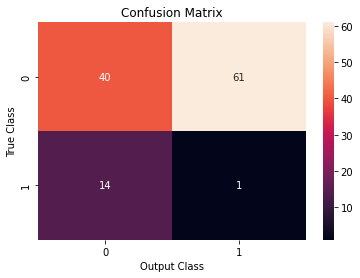

In [39]:
cm = sklearn.metrics.confusion_matrix(y, y_hat)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)
plt.xlabel('Output Class')
plt.ylabel('True Class')
plt.show()

## GPT-3 Sandbox

In [47]:
scorer = score.GPT3_Scorer('trained_models/gpt3_scorer')

In [48]:
scorer.train(score.get_train_data())

100%|██████████| 95/95 [02:49<00:00,  1.79s/it]


In [54]:
scorer.score("Pediatrics 5", "reduction")

1

In [75]:
openai.File.download('file-cX1LXWFYjKdFAv76oNcyeS6r')

InvalidRequestError: Not allowed to download files of purpose: classifications

In [ ]:
import tqdm

for f in tqdm.tqdm(openai.File.list().data):
    openai.File.delete(f.id)